In [1]:
import tensorboard as tensorboard
import seaborn as seaborn
from tensorflow.python.client import device_lib
import tensorflow as tf
print('tensorflow' + tf.__version__)
print('tensorboard' + tensorboard.__version__)
print('seaborn' + seaborn.__version__)
tf.config.list_physical_devices('GPU')
tf.test.is_built_with_cuda
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.list_physical_devices('GPU')
device_lib.list_local_devices()

tensorflow2.1.0-dlenv_tfe
tensorboard2.1.1
seaborn0.10.0
Num GPUs Available:  1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 317788618751626627,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3654068621596942653
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15459303704382856521
 physical_device_desc: "device: XLA_GPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14728907981
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5951269527703925780
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

data_dir="../input/pets"
test_path= os.path.join(data_dir, 'test')
train_path= os.path.join(data_dir, 'train')
os.listdir(train_path)

['dogs', 'cats']

In [3]:

cat_image = train_path + '/cats/' + os.listdir(train_path + '/cats')[0]
imread(cat_image).shape
# plt.imshow(imread(cat_image))

(500, 375, 3)

'../input/pets/train/dogs/super-perro-de-lado.JPG'

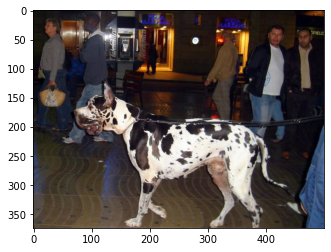

In [4]:
dog_image = train_path + '/dogs/' + os.listdir(train_path + '/dogs/')[5]
plt.imshow(imread(dog_image))
dog_image

In [5]:
len(os.listdir(train_path + '/dogs'))

551

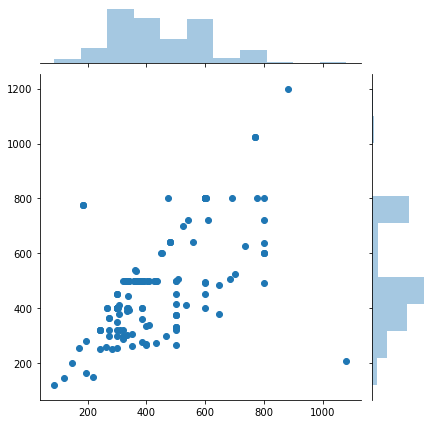

In [6]:
dim1=[]
dim2=[]

for image_filename in os.listdir(test_path + '/dogs/'):
    img = imread(test_path+'/dogs/' + image_filename)
#     print (train_path+'\\dogs\\' + image_filename)
    d1,d2, _ = img.shape
    dim1.append(d1)
    dim2.append(d2)
sns.jointplot(dim1, dim2)

In [7]:
np.mean(dim2)
imread(dog_image).shape
image_shape =(200, 200, 3)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rescale =1/255, 
                               fill_mode='nearest')

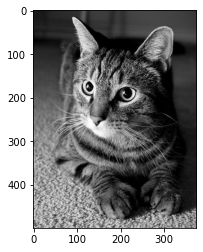

In [9]:
# plt.imshow(imread(cat_image))
cat_image
plt.imshow(image_gen.random_transform(imread(cat_image)))

In [10]:
image_gen.flow_from_directory(train_path)

Found 1338 images belonging to 2 classes.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(4,4), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(4,4), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(4,4), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 197, 197, 128)     6272      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 95, 95, 256)       524544    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 256)       1048832   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 123904)            0

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)
batch_size=16

train_image_gen= image_gen.flow_from_directory(train_path, target_size=image_shape[:2], 
                                               color_mode='rgb', batch_size=batch_size, 
                                               class_mode='binary')

test_image_gen= image_gen.flow_from_directory(test_path, target_size=image_shape[:2], 
                                               color_mode='rgb', batch_size=batch_size, 
                                               class_mode='binary', shuffle=False)

train_image_gen.class_indices

Found 1338 images belonging to 2 classes.
Found 397 images belonging to 2 classes.


{'cats': 0, 'dogs': 1}

In [14]:
results = model.fit(train_image_gen, epochs=10, validation_data=test_image_gen, callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 84 steps, validate for 25 steps
Epoch 1/20
84/84 [==============================] - 23s 273ms/step - loss: 0.7635 - accuracy: 0.5531 - val_loss: 0.6958 - val_accuracy: 0.5013
Epoch 2/20
84/84 [==============================] - 15s 175ms/step - loss: 0.6774 - accuracy: 0.5777 - val_loss: 0.7094 - val_accuracy: 0.5013
Epoch 3/20
84/84 [==============================] - 15s 177ms/step - loss: 0.6745 - accuracy: 0.5755 - val_loss: 0.6946 - val_accuracy: 0.5013
Epoch 4/20
84/84 [==============================] - 15s 179ms/step - loss: 0.6778 - accuracy: 0.5867 - val_loss: 0.6996 - val_accuracy: 0.5013
Epoch 5/20
84/84 [==============================] - 15s 181ms/step - loss: 0.6626 - accuracy: 0.5867 - val_loss: 0.6902 - val_accuracy: 0.5013
Epoch 6/20
84/84 [==============================] - 15s 183ms/step - loss: 0.6555 - accuracy: 0.5874 - val_loss: 0.6859 - val_accuracy: 0.5013
Epoch 7/20
84/84 [==============================] 

In [15]:
history = results.history
history

{'loss': [0.7637544491722267,
  0.6771758054403981,
  0.6741999197968453,
  0.6774610013705198,
  0.662371727917761,
  0.655053086879542,
  0.6478353258562016,
  0.6565709733285889,
  0.6327882919610883,
  0.602668046327628,
  0.6035045519003419,
  0.5518751889244502,
  0.5018758664216696,
  0.43017806796571423,
  0.39412561157002757],
 'accuracy': [0.5530643,
  0.577728,
  0.5754858,
  0.58669657,
  0.58669657,
  0.58744395,
  0.5896861,
  0.5986547,
  0.6337818,
  0.6591928,
  0.7070254,
  0.73019433,
  0.7518685,
  0.80717486,
  0.8243647],
 'val_loss': [0.6958186507225037,
  0.7093542623519897,
  0.6945933890342713,
  0.6995909595489502,
  0.6902237915992737,
  0.685945897102356,
  0.7234336650371551,
  0.6851982474327087,
  0.6975740492343903,
  0.6701188230514527,
  0.7005488181114197,
  0.7261096024513245,
  0.6984726393222809,
  0.8113617432117463,
  0.9873800158500672],
 'val_accuracy': [0.50125945,
  0.50125945,
  0.50125945,
  0.50125945,
  0.50125945,
  0.50125945,
  0.5012

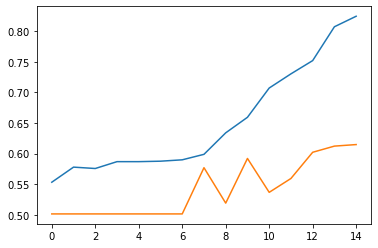

In [16]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])

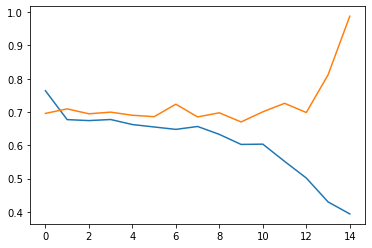

In [18]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])

In [23]:
model.evaluate_generator(test_image_gen)

  ...
    to  
  ['...']


[0.9873800158500672, 0.6146096]

In [25]:
pred = model.predict_generator(test_image_gen)

In [38]:
predictions = pred > 0.5

In [31]:
pred
len(pred)

397

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.58      0.80      0.68       199
           1       0.68      0.43      0.53       198

    accuracy                           0.61       397
   macro avg       0.63      0.61      0.60       397
weighted avg       0.63      0.61      0.60       397



In [43]:
confusion_matrix(test_image_gen.classes, predictions)

array([[159,  40],
       [113,  85]])

In [77]:
dog_image

'../input/pets/train/dogs/super-perro-de-lado.JPG'

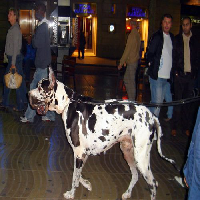

In [82]:
from tensorflow.keras.preprocessing import image
my_image = image.load_img(dog_image, target_size=image_shape)
my_image

In [83]:
my_img_arr = image.img_to_array(my_image)
my_img_arr.shape

(200, 200, 3)

In [84]:
my_img_arr = np.expand_dims(my_img_arr, axis =0)
my_img_arr.shape

(1, 200, 200, 3)

In [85]:
model.predict(my_img_arr)

array([[1.]], dtype=float32)